In [16]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
import sklearn

In [17]:
ad_data = pd.read_csv('./Data/advertising.csv')

In [18]:
ad_data.head(10)

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9
5,8.7,48.9,75.0,7.2
6,57.5,32.8,23.5,11.8
7,120.2,19.6,11.6,13.2
8,8.6,2.1,1.0,4.8
9,199.8,2.6,21.2,15.6


In [19]:
ad_data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


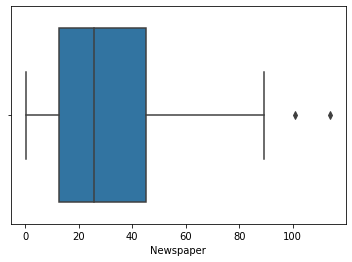

In [20]:
sns.boxplot(data = ad_data, x = 'Newspaper')
plt.show()

In [21]:
# clip the values to 0.98 percentile 
max_val = np.percentile(ad_data['Newspaper'], q = 98)
min_val = np.percentile(ad_data['Newspaper'], q = 0)

ad_data['Newspaper'] = np.clip(ad_data['Newspaper'], min_val, max_val)

In [22]:
X = ad_data.drop('Sales', axis = 1)
y = ad_data['Sales']

total_rows, total_columns = X.shape

In [23]:
ss = sklearn.preprocessing.StandardScaler()
X_scaled = ss.fit_transform(X)

In [24]:
bias_col = np.ones(shape = (total_rows , 1))
X_scaled = np.concatenate((bias_col, X_scaled), axis = 1)


Building custom linear regression class

In [25]:
class LinearRegression_Custom:
    
    # Constructor
    def __init__(self, X, y, lr=0.01, n_iter=1000):
        
        self.X = X
        self.y = y
        self.lr = lr
        self.n_iter = n_iter
        self.theta = np.zeros(shape = (self.X.shape[1],))
        self.error_list = []
        
    # 1. Predictions
    def predictions(self, data):
        
        return np.dot(data, self.theta)
    
    # 2. Loss Function
    def loss_function(self):
        
        preds = self.predictions(data=self.X)
        act = self.y
        
        mse = np.mean((act-preds)**2)
        
        return mse
    
    # 3. Gradient
    def gradient(self):
        
        preds = self.predictions(data=self.X)
        act = self.y
        m = self.X.shape[0]
        
        error = (act - preds)
        
        return -2*(np.dot(self.X.T, error)/m)
    
    # 4. Gradient Descent
    def train(self):
        
        for _ in range(self.n_iter):
            
            # Compute gradient
            grad = self.gradient()
            
            # Calculate Error
            error = self.loss_function()
            self.error_list.append(error)
            
            # perform the gradient descent algorithm
            self.theta = self.theta - self.lr*grad
            
    # 5. Compute the R squared Score
    def score_R2(self, data, test):
        
        '''
        R2 Score = 1 - summation((actual - predictions)**2)/summation((actual - mean)**2)
        '''
        
        # 1. Make Predictions
        preds = self.predictions(data=data)
        act = test
        
        # 2. Compute RSS: Residula Sum Squared
        rss = np.sum((preds - act)**2)
        
        # 3. Cmpute TSS: Total Squared Error
        tss = np.sum((preds - np.mean(act))**2)
        
        # 4. Compute R Squared
        r2_score = 1 - (rss/tss)
        
        return r2_score 

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.25, random_state = 42)

In [27]:
lr = LinearRegression_Custom(X_train, y_train, lr = 0.1, n_iter=500)
lr.train()


In [28]:
y_preds = lr.predictions(data = X_test)

In [29]:
print(y_preds)

[17.0517869  20.40723541 23.75595622  9.26008405 21.65482118 12.5709476
 21.07304502  8.70455833 17.2806775  16.68677377  8.90853153  8.51123644
 18.26405598  8.0451417  12.68843343 14.97450734  8.12564661 17.91125945
 11.02091357 20.48774523 20.84149185 12.46093436 10.87294338 22.41915923
  9.42843279  7.95519042 20.83536179 13.83141992 10.7931222   7.90483906
 16.00593451 10.63844514 20.8021467  10.3868178  21.62655452 21.18027397
 12.08568337 22.84714232 12.62067803  6.49166541 11.9448265  15.35499426
  9.91134477  9.47548809 17.28075708  7.25152871 10.37673904 15.24704673
 11.17809704 11.71158175]


In [30]:
print(sklearn.metrics.r2_score(y_test, y_preds))

0.9114583414099474


Error analysis 

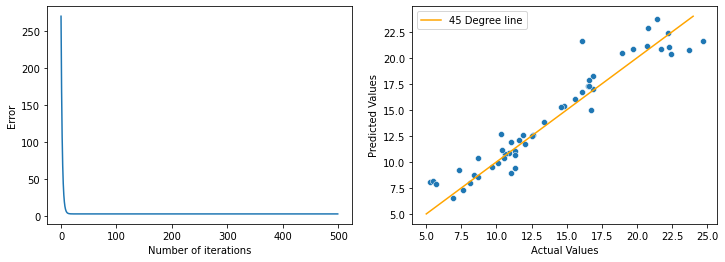

In [33]:
# plot the predictions with actual values and plot the error as well 

fig, ax = plt.subplots(1,2, figsize=(12, 4))
ax[0].plot(lr.error_list)
sns.scatterplot(x = y_test, y = y_preds, ax = ax[1])
ax[1].plot(np.arange(5.0, 25.0), np.arange(5.0, 25.0), color = 'orange', label = "45 Degree line")
ax[0].set_xlabel("Number of iterations")
ax[0].set_ylabel("Error")
ax[1].set_xlabel("Actual Values")
ax[1].set_ylabel("Predicted Values")
plt.legend()
plt.show()

compare the results with sklearn's linear regression model 

In [34]:
from sklearn.linear_model import LinearRegression
lr_sk = LinearRegression()
lr_sk.fit(X_train, y_train)
lr_preds = lr_sk.predict(X_test)
lr_sk.score(X_test, y_test)

0.9114583414099473

In [36]:
print("sklearn's linear regression parameter: ", lr_sk.coef_[1:])
print("Cutom linear regression parameter: ", lr.theta[1:])

print()

print("sklearn's linear regression bias: ", lr_sk.intercept_)
print("Cutom linear regression bias: ", lr.theta[0])

sklearn's linear regression parameter:  [4.67827221 1.47351573 0.10070279]
Cutom linear regression parameter:  [4.67827221 1.47351573 0.10070279]

sklearn's linear regression bias:  15.223719990023872
Cutom linear regression bias:  15.223719990023872
